## IMDB Sentimental Analysis
    - import dataset
    - cleaning the dataset
    - exploratory data analysis
    - predictive modelling using machine learning and deep learning 

`import libararies`

In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [2]:
from keras.models import Sequential
from keras import models, regularizers

In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split

In [4]:
import transformers
import tokenizers

In [5]:
import warnings
warnings.filterwarnings('ignore')

`Data Extraction`

In [7]:
df = pd.read_csv('IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
print("Summary statistics of numerical features : \n", df.describe())

print("-----------------------------------------------------------------------")

print("\nTotal number of reviews: ",len(df))

print("------------------------------------------------------------------------")

print("\nTotal number of Sentiments: ", len(list(set(df['sentiment']))))



Summary statistics of numerical features : 
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
-----------------------------------------------------------------------

Total number of reviews:  50000
------------------------------------------------------------------------

Total number of Sentiments:  2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [9]:
# sns.countplot(df['sentiment']);

In [9]:
df.isna().sum()  # to check for null values

review       0
sentiment    0
dtype: int64

there is no null value

`getting duplicate review`

In [10]:
duplicates = df.duplicated().sum() #identify duplicates
print('duplicate values : ', duplicates)

duplicate values :  418


In [11]:
# view duplicate reviews
review = df['review']
duplicated_review = df[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative
...,...,...
47876,this movie sucks. did anyone notice that the e...,negative
44122,"well, the writing was very sloppy, the directi...",negative
23056,"well, the writing was very sloppy, the directi...",negative
10163,"when I first heard about this movie, I noticed...",positive


In [12]:
# removing duplicate review
df.drop_duplicates(inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [14]:
df.shape

(49582, 2)

    now our data contains 49582 rows x 2 cloumns , after removing duplicates

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

##### coverting sentiments into numerical coumns 
    neagtive - 0
    positive - 1

In [18]:
df['sentiment'].replace({'negative' : 0, 'positive' : 1}, inplace= True)
df.head()

# df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
# df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


`Pre-processing`
    

In [19]:
# copying into new dataframe to analyse
df_new  = df.copy(deep = True) 
df_new.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [22]:
# Total word count in each sentiment
df_new['total_word_count'] = [len(x.split())for  x in df_new['review']]

# character count (excluding spaces)
df_new['character_count'] = [len(''.join(x.split())) for x in df_new['review']]

# counting the upper case
df_new['upper_case'] = df_new['review'].apply(lambda x : len([x for x in x.split() if x.isupper()]))

# counting lower case
df_new['lower_case'] = df_new['review'].apply(lambda x : len([x for x in x.split() if x.islower()]))

# counting the digits (numeric letters)
df_new['digit_count'] = df_new['review'].apply( lambda x : len([x for x in x.split() if x.isdigit()]))

# average word count
df_new['average_word_count'] = df_new['character_count']/df_new['total_word_count']

# counting number of stop words 

from nltk.corpus import stopwords
stop_word=stopwords.words('english')
df_new['stopwords'] = df_new['review'].apply(lambda x: len([x for x in x.split() if x in stop_word]))


In [23]:
df_new.head()

,review,sentiment,total_word_count,character_count,upper_case,lower_case,digit_count,average_word_count,stopwords
0,One of the other reviewers has mentioned that ...,1,307,1455,8,266,1,4.739414,122
1,A wonderful little production. <br /><br />The...,1,162,837,2,148,0,5.166667,62
2,I thought this was a wonderful way to spend ti...,1,166,761,3,142,0,4.584337,70
3,Basically there's a family where a little boy ...,0,138,611,3,118,1,4.427536,58
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,1088,1,196,0,4.730435,92


----------------------------------------------------------------------------
`Text Processing`

    - remove html tags 
    - remove non characters (digits , symbols)
    - remove emoticons
    - convert to lower case
    - remove stop words 
    - convert to root word by stemming (PortusStemmer ) / Lemmetization



In [31]:
stop_words = stopwords.words('english')
wl = WordNetLemmatizer()

In [32]:
# function to clean data

def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #removing html tags
    text = soup.get_text()
    # text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    
    text = re.sub(r'http\S+', '', text) #remove urls
    
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    
    #removing stop word
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop_words and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop_words and word.isalpha()]) 
    
    return text

In [33]:
data = df.copy()

In [34]:
# applying cleanText function to our dataset
# lemmatizing

df['review']=df['review'].apply(clean_text,lemmatize = True)

In [35]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


`Exploratory Data Analysis`

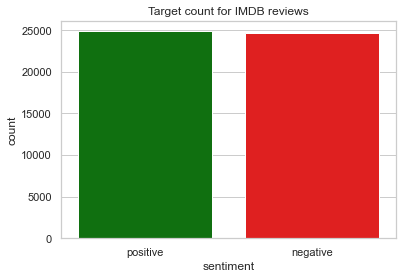

In [36]:
sns.set(style = 'whitegrid', font_scale = 1)
sns.countplot(df.sentiment, palette = ['green', 'red'], order = [1,0])
plt.xticks(ticks=np.arange(2), labels= ['positive', 'negative'])
plt.title('Target count for IMDB reviews')
plt.show()

In [40]:
print("positive reviews : ", df['sentiment'].value_counts()[0])
print("positive review percentage : ", round(df['sentiment'].value_counts()[0]/len(data)*10, 2), '%') 

print("positive reviews : ", df['sentiment'].value_counts()[1])
print("Negative review percentage : ", round(df['sentiment'].value_counts()[1]/len(data) * 10, 2), '%')

positive reviews :  24698
positive review percentage :  4.98 %
positive reviews :  24884
Negative review percentage :  5.02 %


In [38]:
# df.head()

`word cloud  - positive`

In [41]:
from wordcloud import WordCloud
# def plot_img(img):
#     plt.figure(dpi=200)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.tight_layout()
#     plt.show()

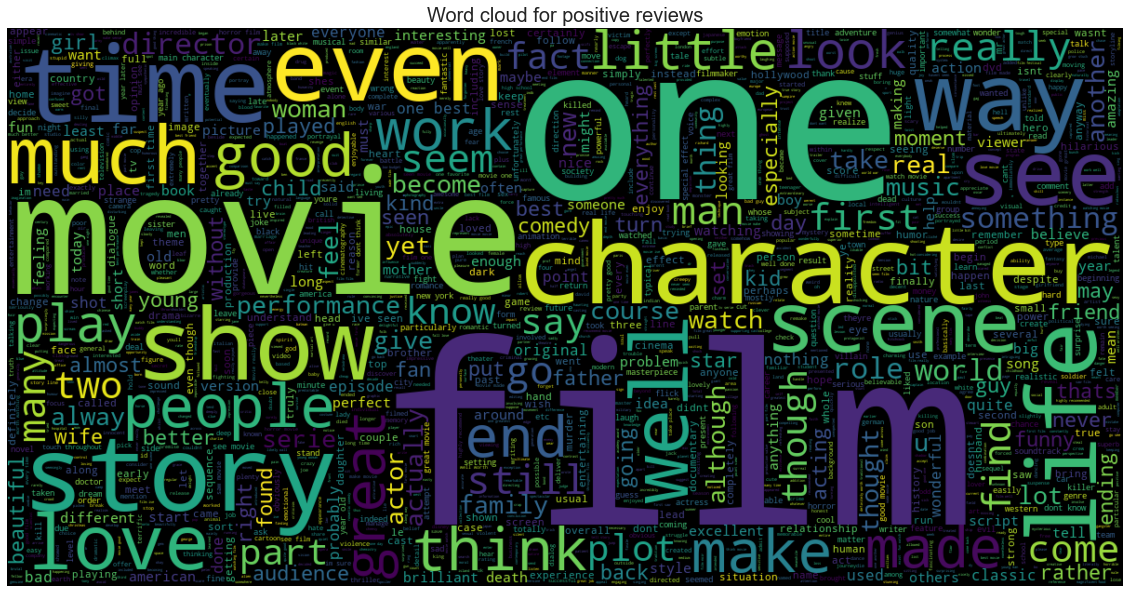

In [62]:
# positive_sentiments = " ".join(df[df['sentiment'] == 1]['review'])

# pos_wordcloud = WordCloud(width=720, height=480).generate(positive_sentiments)
# plot_img(pos_wordcloud)
#word cloud for positive reviews

positive_sentiments = df[df.sentiment == 1]['review']
positive_sentiment_string = ' '.join(positive_sentiments)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600).generate(positive_sentiment_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

`word cloud - negative sentimnets`

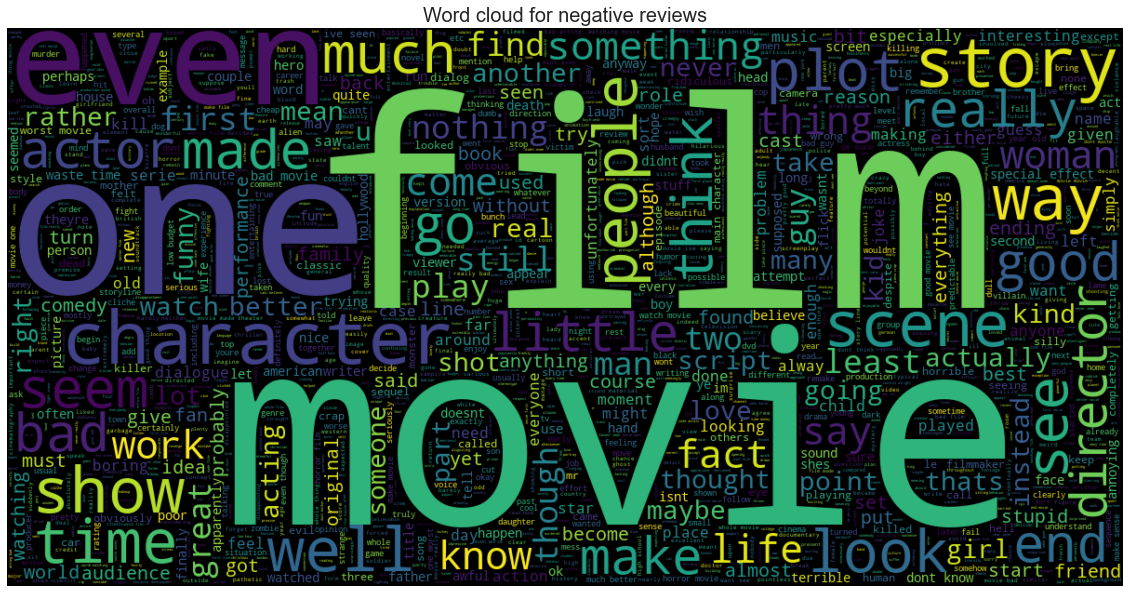

In [65]:
# negative_sentiments = " ".join(df[df['sentiment'] == 0]['review'])

# neg_wordcloud = WordCloud(width=720, height=480).generate(negative_sentiments)
# plot_img(neg_wordcloud)

negative_sentiments = df[df.sentiment == 0]['review']
negative_sentiment_string = ' '.join(negative_sentiments)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600).generate(negative_sentiment_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

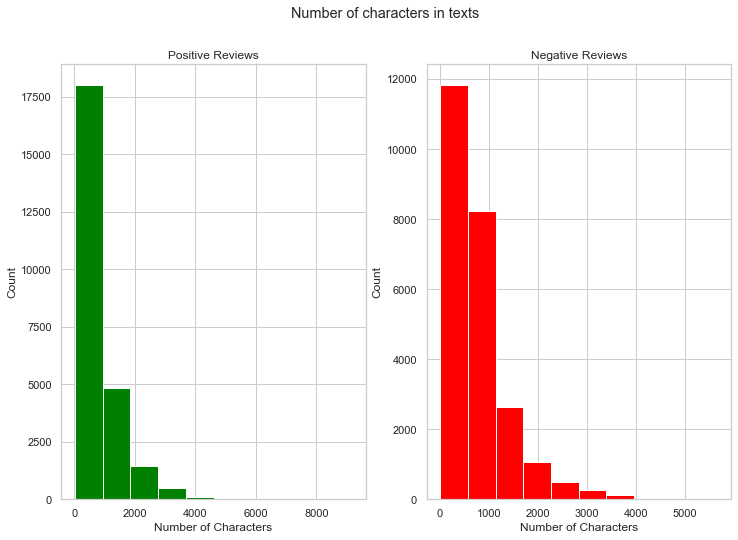

In [66]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len = positive_sentiments.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_sentiments.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

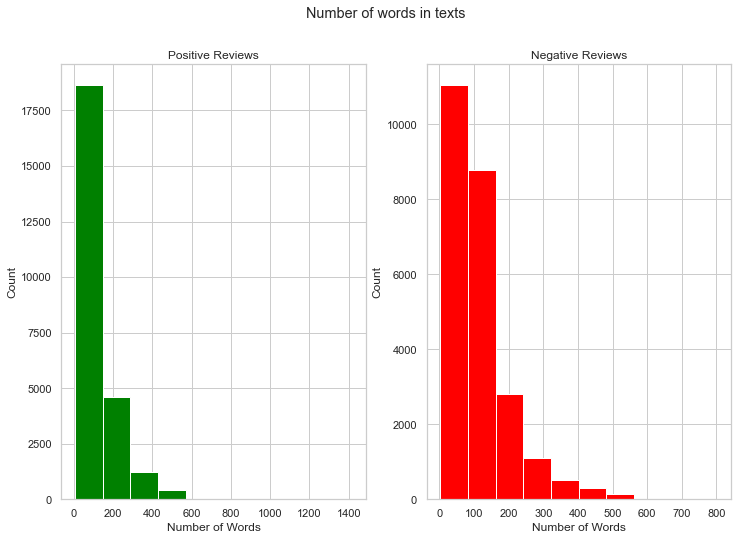

In [67]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_sentiments.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_sentiments.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

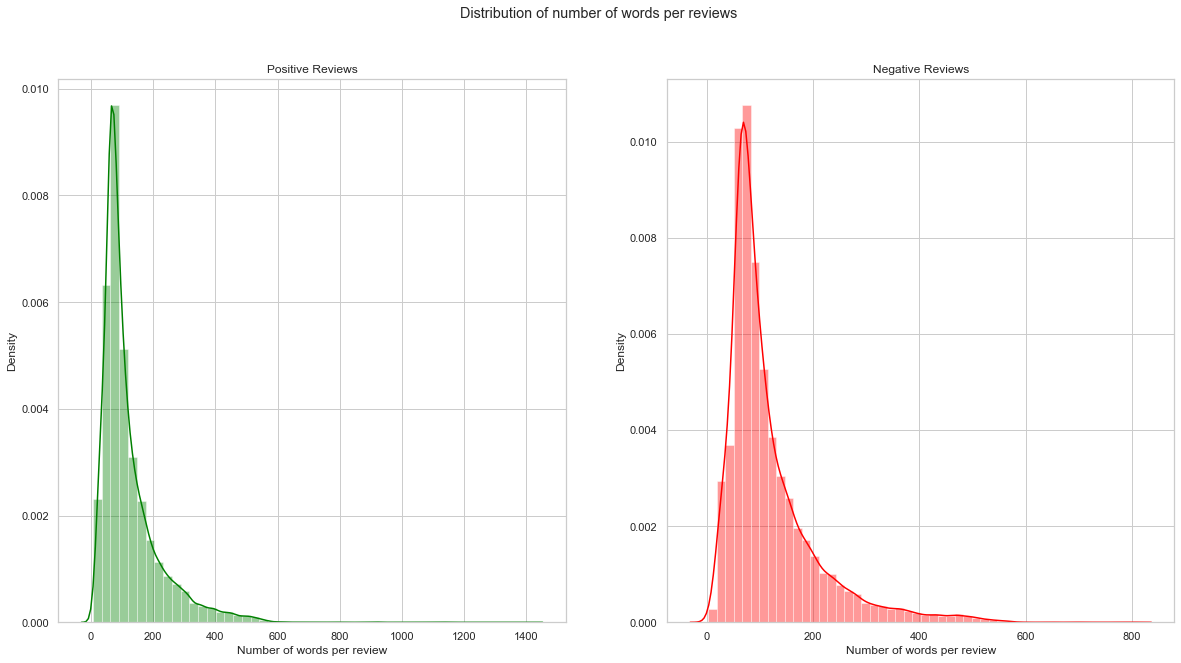

In [68]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_sentiments.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_sentiments.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

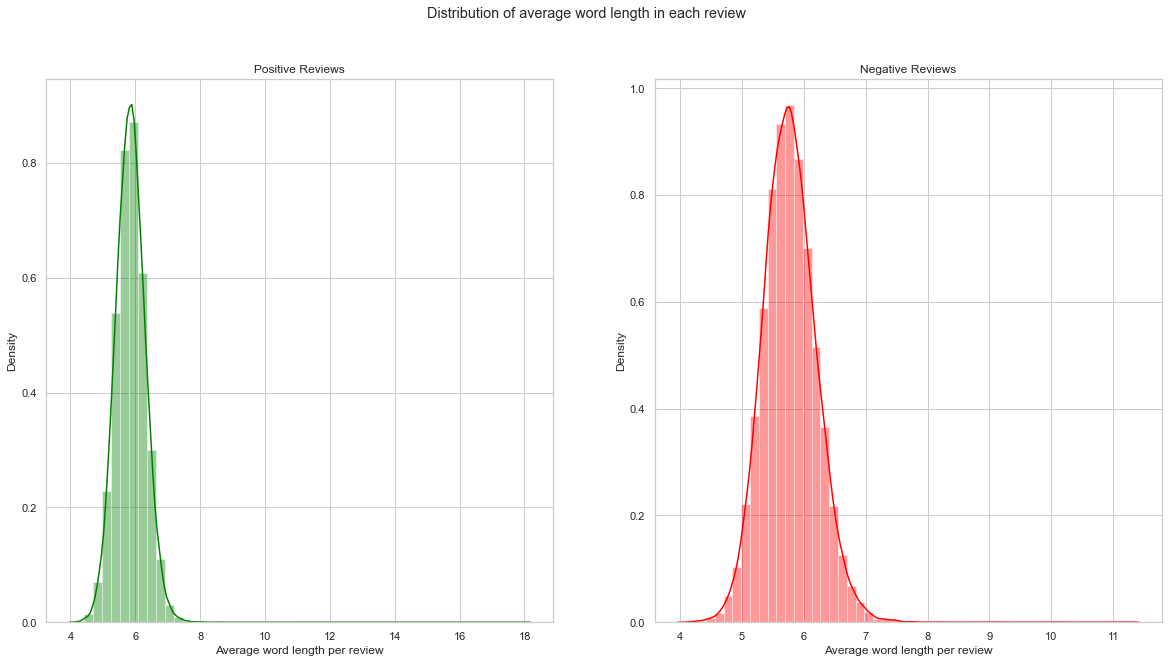

In [70]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_sentiments.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_sentiments.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

In [71]:
df.review

0        one reviewer mentioned watching oz episode you...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there family little boy jake think t...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 49582, dtype: object

In [74]:
# getting collection of text
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['one', 'reviewer', 'mentioned', 'watching', 'oz']

In [75]:
#  getting the most common words from our review data
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(15)
most_common = pd.DataFrame(most_common,columns = ['word','count'])
most_common

,word,count
0,movie,100605
1,film,91130
2,one,53525
3,like,39746
4,time,30091
5,good,28905
6,character,27801
7,story,24600
8,even,24440
9,get,24328


In [78]:
# sorting
most_common = most_common.sort_values('count')
most_common

,word,count
14,scene,20961
13,really,22862
12,make,23465
11,see,23518
10,would,23837
9,get,24328
8,even,24440
7,story,24600
6,character,27801
5,good,28905


In [88]:
type(most_common['count'])

pandas.core.series.Series

In [87]:
most_common

14     20961
13     22862
12     23465
11     23518
10     23837
9      24328
8      24440
7      24600
6      27801
5      28905
4      30091
3      39746
2      53525
1      91130
0     100605
Name: count, dtype: int64

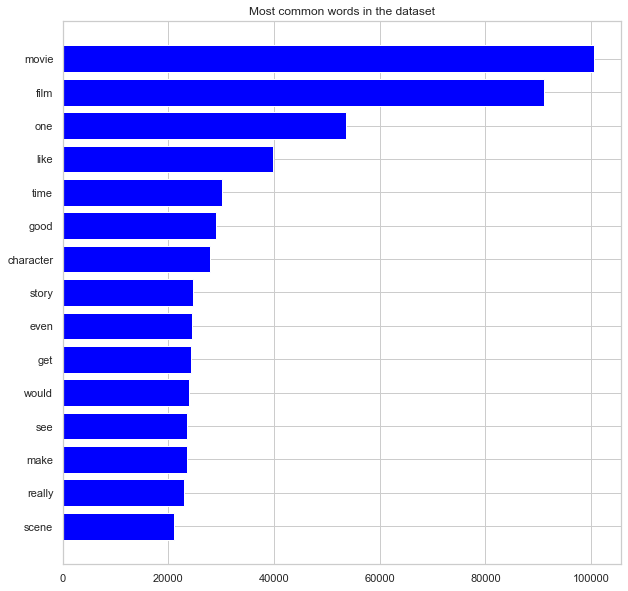

In [89]:
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common['word']))
plt.barh(range(len(most_common)), list(most_common['count']),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

`check which of the words are most often existing in pairs (show up together)` 

     1 - unigram
     2 - bigram  (combination of two words)
     3 - trigram (combination of three words)

In [91]:

def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

In [94]:
# unigram

# positive
uni_pos = get_ngrams(positive_sentiments, 20, 1)
uni_pos = dict(uni_pos)
#creating dataframe
temp1 = pd.DataFrame(list(uni_pos.items()), columns=['common_word', 'count'])

#negative
uni_neg = get_ngrams(negative_sentiments, 20, 1)
uni_neg = dict(uni_neg)
#creating dataframe
temp2 = pd.DataFrame(list(uni_neg.items()), columns=['common_word', 'count'])


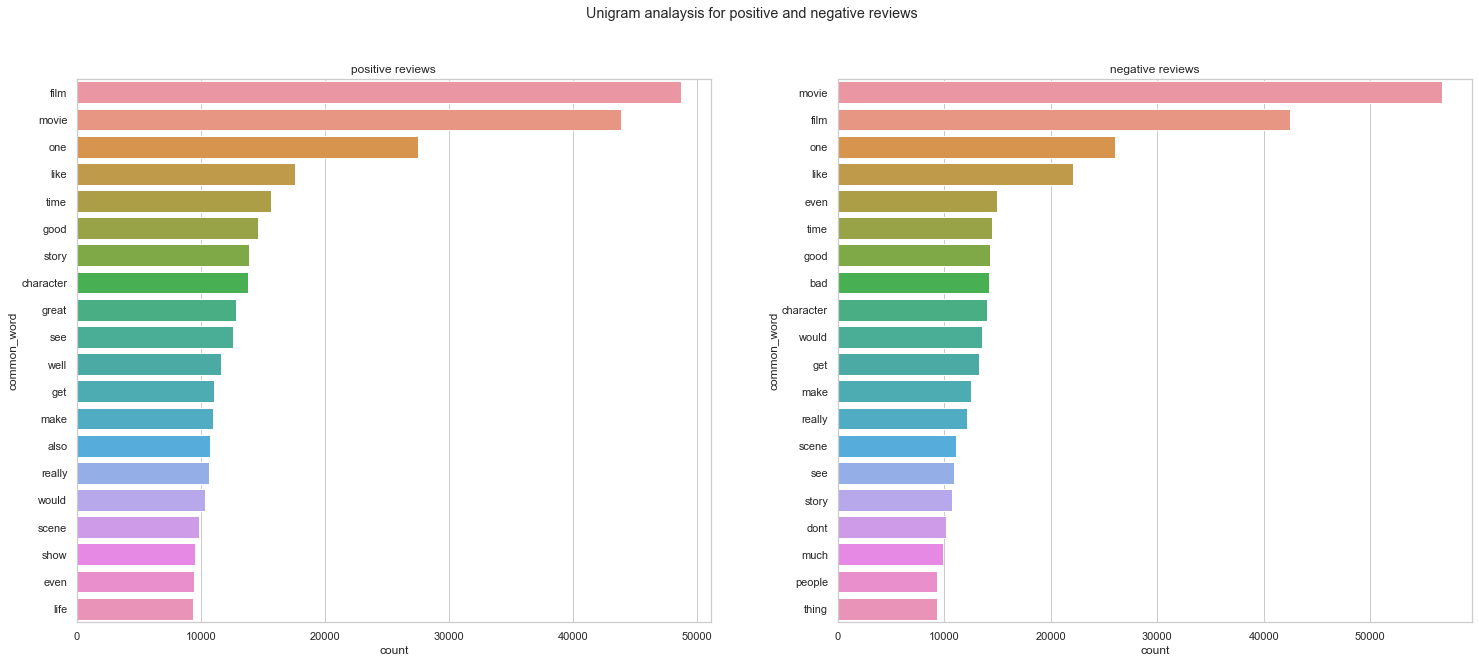

In [104]:
# bar plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

sns.barplot(data = temp1, x ='count', y='common_word', orient = 'h', ax=ax1)
ax1.set_title('positive reviews')

sns.barplot(data = temp2, x ='count', y='common_word', orient = 'h', ax=ax2)
ax2.set_title('negative reviews')

fig.suptitle('Unigram analaysis for positive and negative reviews')
plt.show()

In [105]:
# bigram

# positive
bi_pos = get_ngrams(positive_sentiments, 20, 2)
bi_pos = dict(bi_pos)
#creating dataframe
temp1 = pd.DataFrame(list(bi_pos.items()), columns=['common_word', 'count'])

#negative
bi_neg = get_ngrams(negative_sentiments, 20, 2)
bi_neg = dict(bi_neg)
#creating dataframe
temp2 = pd.DataFrame(list(bi_neg.items()), columns=['common_word', 'count'])


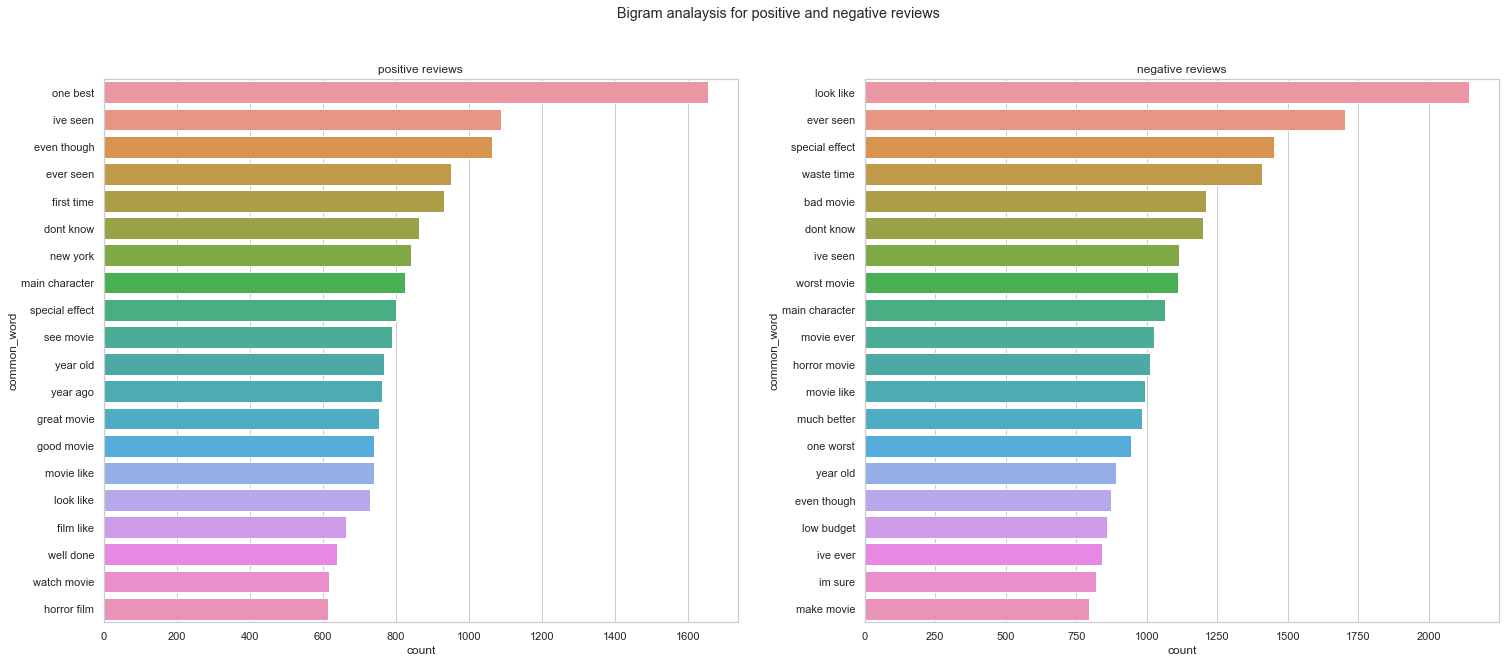

In [106]:
# bar plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

sns.barplot(data = temp1, x ='count', y='common_word', orient = 'h', ax=ax1)
ax1.set_title('positive reviews')

sns.barplot(data = temp2, x ='count', y='common_word', orient = 'h', ax=ax2)
ax2.set_title('negative reviews')

fig.suptitle('Bigram analaysis for positive and negative reviews')
plt.show()

In [109]:
# trigram

# positive
tri_pos = get_ngrams(positive_sentiments, 20, 3)
tri_pos = dict(tri_pos)
#creating dataframe
temp1 = pd.DataFrame(list(tri_pos.items()), columns=['common_word', 'count'])

#negative
tri_neg = get_ngrams(negative_sentiments, 20, 3)
tri_neg = dict(tri_neg)
#creating dataframe
temp2 = pd.DataFrame(list(tri_neg.items()), columns=['common_word', 'count'])


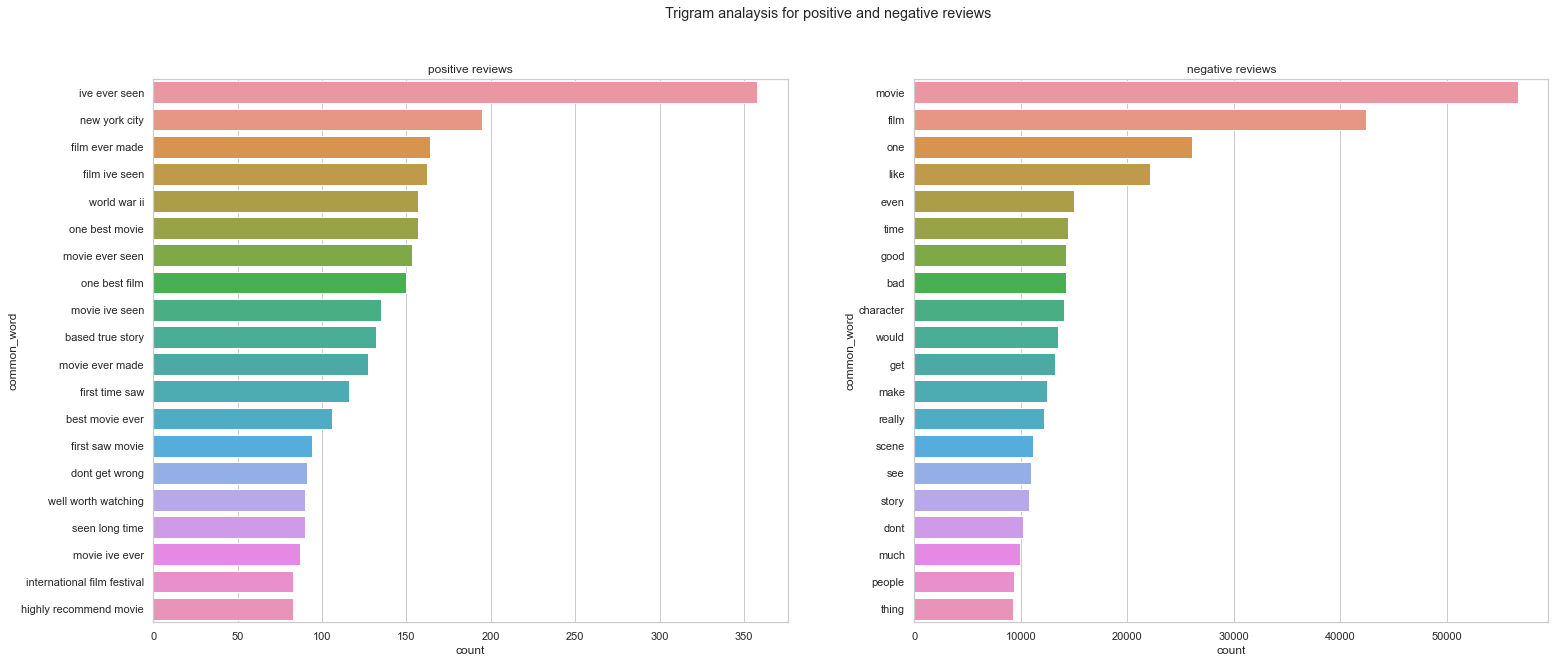

In [108]:
# bar plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

sns.barplot(data = temp1, x ='count', y='common_word', orient = 'h', ax=ax1)
ax1.set_title('positive reviews')

sns.barplot(data = temp2, x ='count', y='common_word', orient = 'h', ax=ax2)
ax2.set_title('negative reviews')

fig.suptitle('Trigram analaysis for positive and negative reviews')
plt.show()

### Predictive Modelling Using Machine Learning

`Train-Test Spit`

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.1, random_state=0)

In [115]:
print('train values : ', x_train.shape[0])
print('test values : ', x_test.shape[0])
print('Show a review in the training set : \n', x_train.iloc[10])


train values :  44623
test values :  4959
Show a review in the training set : 
 film bad simply defies reality filming grade school material best acting pathetic director forever banished film making form bad cant even watched comedy something along line showgirl thing dvd going cover art write havent misfortune witness please well deserved favor advance dont waste time money piece garbage want see movie comedy aspect many worthy realm trash


In [ ]:
# remove HTML tags
# import re
# def clean_html(raw_html):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, '', raw_html)
#     return cleantext

# # remove special characters
# def remove_special_characters(text, remove_digits=True):
#     pattern=r'[^a-zA-Z0-9]'
#     text=re.sub(pattern,' ',text)
#     return text

# # convert to lower case
# def convert_lower(text):
#     return text.lower()

#remove stopwords
# df['review'] = df['review'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_word))

#Apply function on review column
# df['review']=df['review'].apply(remove_special_characters)

In [26]:
# def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    
#     text = BeautifulSoup(raw_text, 'html.parser').get_text()
#     letters_only = re.sub("[^a-zA-Z]", " ", text)
#     words = letters_only.lower().split() 
    
#     if remove_stopwords:
#         stops = set(stopwords.words("english"))
#         words = [w for w in words if not w in stops]
        
#     if stemming==True:

#         stemmer = SnowballStemmer('english') 
#         words = [stemmer.stem(w) for w in words]
        
#     if split_text==True:
#         return (words)
    
#     return( " ".join(words))

`cleaning xtrain and x_test`

In [29]:
# x_train_clean = []
# x_test_clean = []

# for data in x_train:
#     x_train_clean.append(cleanText(data))
    
# for data in x_test:
#     x_test_clean.append(cleanText(data))

     - now our train and test data is cleaned

## training our model 
    - count vectorizer and naive bayes
    - TFIDF and LogisticRegression()

`count vectorizer with Binomial, Multinomial naive bayes`

In [130]:
CV = CountVectorizer( )
x_train_cv = CV.fit_transform(x_train)
x_test_cv = CV.transform(x_test)

In [128]:
# print("Number of features : %d \n" %len(CV.get_feature_names()))  
# print("feature names : \n", CV.get_feature_names()[::1000])

In [134]:
# training Multinomial naive bayes classifier
mnb_clf = MultinomialNB()
mnb_clf.fit(x_train_cv, y_train)
y_pred_mnb = mnb_clf.predict(x_test_cv)


bnb_clf = BernoulliNB()
bnb_clf.fit(x_train_cv, y_train)
y_pred_bnb = bnb_clf.predict(x_test_cv)

In [135]:

def modelEvaluation(y_pred):
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test,y_pred)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, y_pred)))
    print("\nClassification report : \n", metrics.classification_report(y_test, y_pred))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, y_pred))

In [152]:
print("----------------------------------------------")
print("Evaluating Bernoulli Naive Bayes Classifier MOdel \n")
modelEvaluation(y_pred_bnb)

----------------------------------------------
Evaluating Bernoulli Naive Bayes Classifier MOdel 


Accuracy on validation set: 0.8488

AUC score : 0.8488

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2476
           1       0.87      0.82      0.84      2483

    accuracy                           0.85      4959
   macro avg       0.85      0.85      0.85      4959
weighted avg       0.85      0.85      0.85      4959


Confusion Matrix : 
 [[2165  311]
 [ 439 2044]]


In [150]:
print("----------------------------------------------")
print("Evaluating multinomial Naive Bayes Classifier MOdel \n")
modelEvaluation(y_pred_mnb)

----------------------------------------------
Evaluating multinomial Naive Bayes Classifier MOdel 


Accuracy on validation set: 0.8508

AUC score : 0.8508

Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      2476
           1       0.87      0.83      0.85      2483

    accuracy                           0.85      4959
   macro avg       0.85      0.85      0.85      4959
weighted avg       0.85      0.85      0.85      4959


Confusion Matrix : 
 [[2161  315]
 [ 425 2058]]


`TFIDF vectorizer with logistic Regression`

In [76]:
from sklearn.linear_model import LogisticRegression

In [153]:
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5 (strictly ignore the term lower than the given frequrency)

In [156]:
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
# print("Number of features : ",len(tfidf.get_feature_names())) 
# print("some feature names : \n", tfidf.get_feature_names()[::1000])

Number of features :  32731
some feature names : 
 ['aa', 'ancestry', 'backroom', 'blocked', 'callgirl', 'claire', 'contribute', 'dead', 'disobedient', 'elaine', 'expressionless', 'footage', 'glossed', 'hatton', 'icecream', 'inuyasha', 'kiwi', 'locket', 'maxine', 'moses', 'nursing', 'paralyzed', 'polarized', 'quaint', 'replacing', 'sailor', 'sharply', 'sole', 'struggled', 'terrence', 'trundle', 'valentino', 'whoville']


In [159]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
y_pred_lr = lr.predict(x_test_tfidf)

modelEvaluation(y_pred_lr)


Accuracy on validation set: 0.8943

AUC score : 0.8943

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      2476
           1       0.89      0.90      0.90      2483

    accuracy                           0.89      4959
   macro avg       0.89      0.89      0.89      4959
weighted avg       0.89      0.89      0.89      4959


Confusion Matrix : 
 [[2193  283]
 [ 241 2242]]


In [80]:
# feature_names = np.array(tfidf.get_feature_names())
# sorted_coef_index = lr.coef_[0].argsort()

In [81]:
# print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
# print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['worst' 'bad' 'awful' 'waste' 'boring' 'terrible' 'poor' 'nothing'
 'horrible' 'dull']

Top 10 features with largest coefficients : 
['great' 'excellent' 'perfect' 'best' 'amazing' 'wonderful' 'loved'
 'brilliant' 'favorite' 'enjoyed']


`Linear SVM Classifier`

In [165]:
lsvc = LinearSVC()
lsvc.fit(x_train_tfidf, y_train)

y_pred_lsvc = lsvc.predict(x_test_tfidf)
modelEvaluation(y_pred_lsvc)


Accuracy on validation set: 0.8893

AUC score : 0.8893

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      2476
           1       0.89      0.89      0.89      2483

    accuracy                           0.89      4959
   macro avg       0.89      0.89      0.89      4959
weighted avg       0.89      0.89      0.89      4959


Confusion Matrix : 
 [[2200  276]
 [ 273 2210]]


`XGboost`

In [166]:
xgb = XGBClassifier()
xgb.fit(x_train_tfidf, y_train)

[12:28:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
y_pred_xgb = xgb.predict(x_test_tfidf)

In [169]:
modelEvaluation(y_pred_xgb)


Accuracy on validation set: 0.8570

AUC score : 0.8570

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      2476
           1       0.84      0.88      0.86      2483

    accuracy                           0.86      4959
   macro avg       0.86      0.86      0.86      4959
weighted avg       0.86      0.86      0.86      4959


Confusion Matrix : 
 [[2065  411]
 [ 298 2185]]


In [160]:
# y_pred = lr.predict(tfidf.transform(x_test_clean))
# modelEvaluation(y_pred)

In [83]:
# grid search CV

In [23]:
models = [
    ("SVM Classifier", LinearSVC()),
    ("Multinomaial Navie Bays", MultinomialNB()),
    ("Binimal Naive Bayes", BernoulliNB()),
    ("XGBoost",XGBClassifier())
]

In [18]:
def train_models(models, X, y):
    for name, model in models:
        print(f"Fitting Model: {name}")
        st = time.monotonic()
        model.fit(X, y)
        et = time.monotonic()
        print("Time Taken in Fitting: ", et-st)
        
        print("\n\n")
        
        st = time.monotonic()
        y_hat = model.predict(X)
        et = time.monotonic()
        print("Time Taken in Prediction: ", et-st)
        print("\n", "_"*80, "\n")

In [24]:
def plot_roc_curve(models, X, y):
    plt.figure(dpi=150)
    for name, model in models:
        y_hat = model.predict_proba(X)[:, 1]
        fpr, tpr, th = roc_curve(y, y_hat, pos_label='spam')
        plt.plot(fpr, tpr, label=name)
    plt.plot([0, 1], [0, 1], 'k--', label='Bad Model')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [25]:
plot_roc_curve(models, x_train, y_train)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

<Figure size 900x600 with 0 Axes>

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


params = {"lr__C":[0.1, 1, 10], 
          "tfidf__min_df": [1, 3], 
          "tfidf__max_features": [1000, None], 
          "tfidf__ngram_range": [(1,1), (1,2)], 
          "tfidf__stop_words": [None, "english"]} 

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(x_train_clean, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
y_pred = grid.predict(x_test_clean)
modelEvaluation(y_pred)

## predictive modelling using Deep Learning

`LSTM`

In [8]:
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras import models, regularizers
from keras.preprocessing.text import Tokenizer

In [12]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
import re

def remove_tags(text):
    regular_expression_tag = re.compile(r'<[^>]+>')
    return regular_expression_tag.sub('',text)

df['review'] = df['review'].apply(remove_tags)
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.3, random_state=0)

In [23]:
x_train.shape, x_test.shape

((35000,), (15000,))

In [25]:
top_words  =  5000 

In [26]:
token = Tokenizer( num_words=top_words )
token.fit_on_texts(x_train)

In [28]:
max_review_length  =  500 
x_train =  pad_sequences ( x_train , maxlen  =  max_review_length )
x_test = pad_sequences ( x_test , maxlen  =  max_review_length )

ValueError: invalid literal for int() with base 10: 'whose views on women were controversial. However, despite Alphonse Ethier\'s lectures and advice not to be defeated by life, Lily\'s grab for power and money likely owed more to her upbringing and he

In [13]:
token = Tokenizer( num_words=2000 )
token.fit_on_texts(x_train)

x_train_seq = token.texts_to_sequences(x_train)
x_test_seq = token.texts_to_sequences(x_test)

x_train_final = pad_sequences( x_train_seq, maxlen=100 )
x_test_final = pad_sequences( x_test_seq, maxlen=100 )

In [14]:
# import RNN
from keras.layers.recurrent import SimpleRNN

In [15]:

model = Sequential()
model.add( Embedding(output_dim=32, input_dim=2000, input_length=100) )
model.add( Dropout(0.35) )
model.add( Dense(units=256, activation='relu') )
model.add( Dropout(0.5) )
model.add( Dense(units=1, activation='sigmoid') )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           64000     
_________________________________________________________________
dropout (Dropout)            (None, 100, 32)           0         
_________________________________________________________________
dense (Dense)                (None, 100, 256)          8448      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 100, 1)            257       
Total params: 72,705
Trainable params: 72,705
Non-trainable params: 0
_________________________________________________________________


In [16]:

model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [17]:

train_history = model.fit( x_train_final, y_train, batch_size=100, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at \AppData\Local\Temp/ipykernel_2700/3608942735.py:1) ]] [Op:__inference_train_function_949]

Function call stack:
train_function


In [21]:
x_train

19977    This is real character and story driven drama ...
31768    One of the many speculations about Y2K was tha...
43126    I have mixed emotions about this film, especia...
29441    I saw that "The Foreigner" was ranked in the "...
6245     So it's a little dated now, it's almost 30 yrs...
                               ...                        
21243    I did not set very high expectations for this ...
45891    THE BLOB is a great horror movie, not merely b...
42613    After too many years of waiting, Anne Rivers S...
43567    I am a massive fan of the LoG. I thought the f...
2732     AG was an excellent presentation of drama, sus...
Name: review, Length: 45000, dtype: object

## LSTM MODEL


In [29]:
def preprocessing_text(texts):
    texts = re.sub(r'<.*?>', '', texts)
    texts = re.sub(r'[^a-zA-Z]', ' ', texts)
    return ' '.join(x.lower() for x in texts.split())

df['review_clean'] = df['review'].apply(lambda x : preprocessing_text(x))

In [31]:
df['review_clean_500'] = df['review_clean'].apply(lambda x:x[:500])

df['review_clean_500'][2]
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review_clean_500'])
seq = tokenizer.texts_to_sequences(df['review_clean_500'])
X = pad_sequences(seq, padding='post')

print(f'X_shape: {X.shape}, X_min: {np.min(X)}, X_max: {np.max(X)}')
y = df['sentiment'].map({'negative' : 0, 'positive' : 1}).values

X_shape: (50000, 116), X_min: 0, X_max: 9999


In [41]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)
embed_size = 64
model = Sequential([
    Embedding(input_dim=10000, output_dim=embed_size, input_shape=[None], mask_zero=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.summary()


(32000, 116) (8000, 116) (10000, 116) (32000,) (8000,) (10000,)


NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported